# TFM. Parte  2. Aplicación de diferentes algoritmos de Machine Learning


Después de haber preparado el conjunto de datos a tratar, aplicaremos los siguientes algoritmos de Machine Learning para predecir si un siniestro es un fraude o no:
* Regresión Logística
* Decision Tree
* Random_Forest
* Naïve Bayes
* XGBoost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## 1. Creación de conjuntos de entrenamiento y test

Primero de todo, cargamos los ficheros preparados del conjunto de datos a analizar:

In [2]:
x_Dummies_Boruta = pd.read_csv('x_Dummies_Boruta.csv')
x_Dummies_PCA = np.loadtxt('x_Dummies_PCA.csv', delimiter=',')
y_Dummies = pd.read_csv('y_Dummies.csv')

In [3]:
from sklearn.model_selection import train_test_split
x_train_Boruta,x_test_Boruta,y_train_Boruta,y_test_Boruta=train_test_split(x_Dummies_Boruta,
                                                                           y_Dummies,test_size=0.2, random_state= 15)

x_train_PCA,x_test_PCA,y_train_PCA,y_test_PCA=train_test_split(x_Dummies_PCA,y_Dummies,
                                                                               test_size=0.2, random_state= 15)

## 2. Regresión Logística:

Procedemos a entrenar el modelo de regresión logística con los datos de siniestros:


In [4]:
from sklearn.linear_model import LogisticRegression

#iniciamos los diferentes modelos con los parámetros por defecto
LogReg_Boruta = LogisticRegression()
LogReg_PCA = LogisticRegression()

# entrenamos el modelo
LogReg_Boruta.fit(x_train_Boruta,y_train_Boruta)
LogReg_PCA.fit(x_train_PCA,y_train_PCA)

#
y_pred_Boruta = LogReg_Boruta.predict(x_test_Boruta)
y_pred_PCA = LogReg_PCA.predict(x_test_PCA)

In [5]:
print("Training - Precisión con Boruta: "+str(round(accuracy_score(y_train_Boruta,LogReg_Boruta.predict(x_train_Boruta))*100,2))+"%")
print("Training - Precisión con PCA: "+str(round(accuracy_score(y_train_PCA,LogReg_PCA.predict(x_train_PCA))*100,2))+"%")

Training - Precisión con Boruta: 56.64%
Training - Precisión con PCA: 83.89%


In [6]:
print("Test - Precisión con Boruta: "+str(round(accuracy_score(y_test_Boruta,y_pred_Boruta)*100,2))+"%")
print("Test - Precisión con PCA: "+str(round(accuracy_score(y_test_PCA,y_pred_PCA)*100,2))+"%")

Test - Precisión con Boruta: 55.96%
Test - Precisión con PCA: 89.4%


Obtenemos una muy buena precisión con el conjunto de datos obtenido tras aplicar PCA.

In [7]:
LogReg_Boruta.feature_names_in_

array(['months_as_customer', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss'],
      dtype=object)

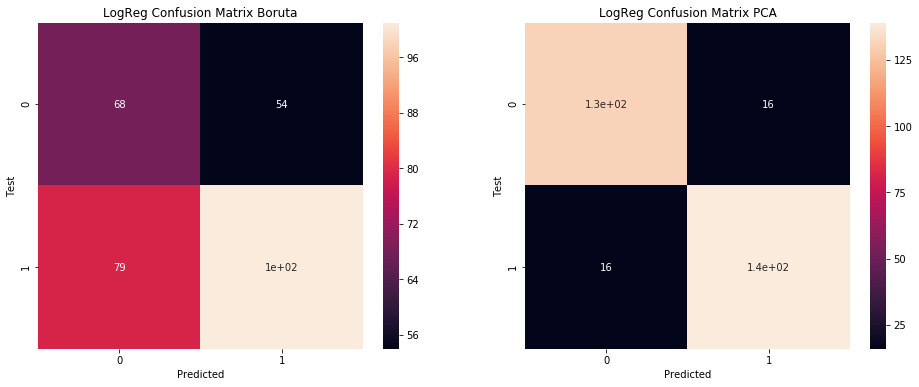

In [8]:

fig1, ax1 = plt.subplots(1,2,figsize=(16,6))

ConfusionMatrix_Boruta = confusion_matrix(y_pred_Boruta,y_test_Boruta)

sns.heatmap(ConfusionMatrix_Boruta,annot=True,ax = ax1[0])
ax1[0].set_title('LogReg Confusion Matrix Boruta', loc='center')
ax1[0].set_ylabel('Test')
ax1[0].set_xlabel('Predicted')

ConfusionMatrix_PCA = confusion_matrix(y_pred_PCA,y_test_PCA)

sns.heatmap(ConfusionMatrix_PCA,annot=True,ax = ax1[1])
ax1[1].set_title('LogReg Confusion Matrix PCA', loc='center')
ax1[1].set_ylabel('Test')
ax1[1].set_xlabel('Predicted')

plt.show()


Mediante la matriz de confusión, observamos como clasifican las observaciones el modelo de regresión.

In [9]:
clf=classification_report(y_pred_Boruta,y_test_Boruta)
print("Classification_report para la Regresión Logística con Boruta:")
print(clf)

Classification_report para la Regresión Logística con Boruta:
              precision    recall  f1-score   support

           N       0.46      0.56      0.51       122
           Y       0.65      0.56      0.60       180

    accuracy                           0.56       302
   macro avg       0.56      0.56      0.55       302
weighted avg       0.58      0.56      0.56       302



In [10]:
clf_PCA=classification_report(y_pred_PCA,y_test_PCA)
print("Classification_report para la Regresión Logística con PCA:")
print(clf_PCA)

Classification_report para la Regresión Logística con PCA:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



Claramente el conjunto de datos después de aplicar PCA consigue muy buenos resultados con el modelo de regresión logística, con hasta un 89% de precisión con el conjunto de test.

## 3. Decision tree

Continuamos intentando predecir si un siniestro es fraude o no. Esta vez aplicando el algoritmo de árboles de decisión.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definición del clasificador y de los diferentes parámetros a probar
dt = DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,20)}

#Iniciamos la busqueda del mejor modelo segun los parámetros a probar
grid_DecisionTree_Boruta = GridSearchCV(dt,parameters)
grid_DecisionTree_PCA = GridSearchCV(dt,parameters)

# entrenamos el modelo
grid_DecisionTree_Boruta.fit(x_train_Boruta,y_train_Boruta)
grid_DecisionTree_PCA.fit(x_train_PCA,y_train_PCA)

# seleccionamos el mejor modelo segun el mejor estimador:
DecisionTree_Boruta = grid_DecisionTree_Boruta.best_estimator_
DecisionTree_PCA = grid_DecisionTree_PCA.best_estimator_

#Realizamos la predicción con los datos de prueba

y_pred_Boruta = DecisionTree_Boruta.predict(x_test_Boruta)
y_pred_PCA = DecisionTree_PCA.predict(x_test_PCA)

In [12]:
print("Training - Precisión con Boruta: "+str(round(accuracy_score(y_train_Boruta,
                                                                   DecisionTree_Boruta.predict(x_train_Boruta))*100,2))+"%")
print("Training - Precisión con PCA: "+str(round(accuracy_score(y_train_PCA,
                                                                DecisionTree_PCA.predict(x_train_PCA))*100,2))+"%")

Training - Precisión con Boruta: 84.05%
Training - Precisión con PCA: 84.05%


In [13]:
print("Test - Precisión con Boruta: "+str(round(accuracy_score(y_test_Boruta,y_pred_Boruta)*100,2))+"%")
print("Test - Precisión con PCA: "+str(round(accuracy_score(y_test_PCA,y_pred_PCA)*100,2))+"%")

Test - Precisión con Boruta: 89.4%
Test - Precisión con PCA: 89.4%


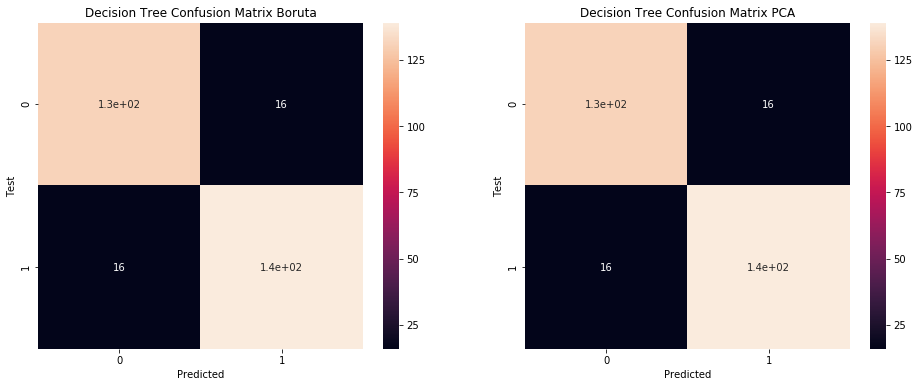

In [14]:
ConfusionMatrix_Boruta = confusion_matrix(y_pred_Boruta,y_test_Boruta)

fig1, ax1 = plt.subplots(1,2,figsize=(16,6))
sns.heatmap(ConfusionMatrix_Boruta,annot=True, ax = ax1[0])
ax1[0].set_title('Decision Tree Confusion Matrix Boruta', loc='center')
ax1[0].set_ylabel('Test')
ax1[0].set_xlabel('Predicted')

ConfusionMatrix_PCA = confusion_matrix(y_pred_PCA,y_test_PCA)

sns.heatmap(ConfusionMatrix_PCA,annot=True,ax = ax1[1])
ax1[1].set_title('Decision Tree Confusion Matrix PCA', loc='center')
ax1[1].set_ylabel('Test')
ax1[1].set_xlabel('Predicted')
plt.show()


In [15]:
clf=classification_report(y_pred_Boruta,y_test_Boruta)
print("Classification_report para Decision Trees con Boruta:")
print(clf)
clf_PCA=classification_report(y_pred_PCA,y_test_PCA)
print("Classification_report para Decision Trees con PCA:")
print(clf_PCA)

Classification_report para Decision Trees con Boruta:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

Classification_report para Decision Trees con PCA:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



Observamos como con el decision tree, tanto para el conjunto de datos con las variables de Boruta como para el conjunto de datos después de aplicar PCA, se obtiene el mismo nivel de precisión. Asimismo, con el conjunto de prueba, obtenemos mejores resultados de precisión que con los de entrenamiento.

## 4. Random Forest

Continuamos intentando predecir si un siniestro es fraude o no. Esta vez aplicando el algoritmo de Random Forest.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Definición del clasificador y de los diferentes parámetros a probar
rf = RandomForestClassifier()
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,20)}

#Iniciamos la busqueda del mejor modelo segun los parámetros a probar
grid_RF_Boruta = GridSearchCV(rf,parameters)
grid_RF_PCA = GridSearchCV(rf,parameters)

# entrenamos el modelo
grid_RF_Boruta.fit(x_train_Boruta,y_train_Boruta)
grid_RF_PCA.fit(x_train_PCA,y_train_PCA)

# seleccionamos el mejor modelo segun el mejor estimador:
RF_Boruta = grid_RF_Boruta.best_estimator_
RF_PCA = grid_RF_PCA.best_estimator_

#Realizamos la predicción con los datos de prueba

y_pred_Boruta = RF_Boruta.predict(x_test_Boruta)
y_pred_PCA = RF_PCA.predict(x_test_PCA)

In [17]:
print("Training - Precisión con Boruta: "+str(round(accuracy_score(y_train_Boruta,
                                                                   RF_Boruta.predict(x_train_Boruta))*100,2))+"%")
print("Training - Precisión con PCA: "+str(round(accuracy_score(y_train_PCA,
                                                                RF_PCA.predict(x_train_PCA))*100,2))+"%")

Training - Precisión con Boruta: 84.8%
Training - Precisión con PCA: 85.88%


In [18]:
print("Test - Precisión con Boruta: "+str(round(accuracy_score(y_test_Boruta,y_pred_Boruta)*100,2))+"%")
print("Test - Precisión con PCA: "+str(round(accuracy_score(y_test_PCA,y_pred_PCA)*100,2))+"%")

Test - Precisión con Boruta: 89.4%
Test - Precisión con PCA: 89.4%


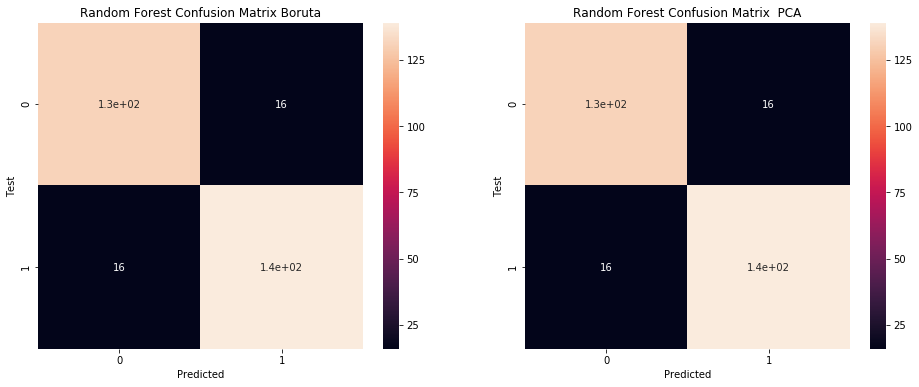

In [19]:
ConfusionMatrix_Boruta = confusion_matrix(y_pred_Boruta,y_test_Boruta)

fig1, ax1 = plt.subplots(1,2,figsize=(16,6))
sns.heatmap(ConfusionMatrix_Boruta,annot=True, ax = ax1[0])
ax1[0].set_title('Random Forest Confusion Matrix Boruta', loc='center')
ax1[0].set_ylabel('Test')
ax1[0].set_xlabel('Predicted')

ConfusionMatrix_PCA = confusion_matrix(y_pred_PCA,y_test_PCA)

sns.heatmap(ConfusionMatrix_PCA,annot=True,ax = ax1[1])
ax1[1].set_title('Random Forest Confusion Matrix  PCA', loc='center')
ax1[1].set_ylabel('Test')
ax1[1].set_xlabel('Predicted')
plt.show()

In [20]:
clf=classification_report(y_pred_Boruta,y_test_Boruta)
print("Classification_report para Random Forest con Boruta:")
print(clf)
clf_PCA=classification_report(y_pred_PCA,y_test_PCA)
print("Classification_report para Random Forest con PCA:")
print(clf_PCA)

Classification_report para Random Forest con Boruta:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

Classification_report para Random Forest con PCA:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



En la aplicación de Random Forest, obtenemos unos resultados similares a los obtenidos con el árbol de decisión pero ligeramente mejores. Con el conjunto de datos de Boruta se consigue llegar a un 89,74% de acierto con los datos de test.

## 5. Naive bayes

Continuamos intentando predecir si un siniestro es fraude o no. Esta vez aplicando Naive Bayes:

In [21]:
from sklearn.naive_bayes import GaussianNB

#Iniciamos la busqueda del mejor modelo segun los parámetros a probar
GNB_Boruta = GaussianNB()
GNB_PCA = GaussianNB()

# entrenamos el modelo
GNB_Boruta.fit(x_train_Boruta,y_train_Boruta)
GNB_PCA.fit(x_train_PCA,y_train_PCA)


#Realizamos la predicción con los datos de prueba
y_pred_Boruta = GNB_Boruta.predict(x_test_Boruta)
y_pred_PCA = GNB_PCA.predict(x_test_PCA)


In [22]:
print("Training - Precisión con Boruta: "+str(round(accuracy_score(y_train_Boruta,
                                                                   GNB_Boruta.predict(x_train_Boruta))*100,2))+"%")
print("Training - Precisión con PCA: "+str(round(accuracy_score(y_train_PCA,
                                                                GNB_PCA.predict(x_train_PCA))*100,2))+"%")

Training - Precisión con Boruta: 61.38%
Training - Precisión con PCA: 84.05%


In [23]:
print("Test - Precisión con Boruta: "+str(round(accuracy_score(y_test_Boruta,y_pred_Boruta)*100,2))+"%")
print("Test - Precisión con PCA: "+str(round(accuracy_score(y_test_PCA,y_pred_PCA)*100,2))+"%")

Test - Precisión con Boruta: 64.24%
Test - Precisión con PCA: 89.4%


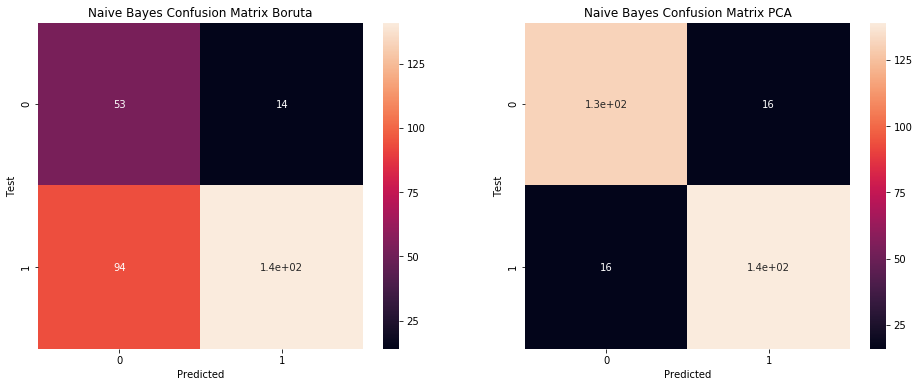

In [24]:
ConfusionMatrix_Boruta = confusion_matrix(y_pred_Boruta,y_test_Boruta)

fig1, ax1 = plt.subplots(1,2,figsize=(16,6))
sns.heatmap(ConfusionMatrix_Boruta,annot=True, ax = ax1[0])
ax1[0].set_title('Naive Bayes Confusion Matrix Boruta', loc='center')
ax1[0].set_ylabel('Test')
ax1[0].set_xlabel('Predicted')

ConfusionMatrix_PCA = confusion_matrix(y_pred_PCA,y_test_PCA)

sns.heatmap(ConfusionMatrix_PCA,annot=True,ax = ax1[1])
ax1[1].set_title('Naive Bayes Confusion Matrix PCA', loc='center')
ax1[1].set_ylabel('Test')
ax1[1].set_xlabel('Predicted')
plt.show()

In [25]:
clf=classification_report(y_pred_Boruta,y_test_Boruta)
print("Classification_report para Naive Bayes con Boruta:")
print(clf)
clf_PCA=classification_report(y_pred_PCA,y_test_PCA)
print("Classification_report para Naive Bayes con PCA:")
print(clf_PCA)

Classification_report para Naive Bayes con Boruta:
              precision    recall  f1-score   support

           N       0.36      0.79      0.50        67
           Y       0.91      0.60      0.72       235

    accuracy                           0.64       302
   macro avg       0.64      0.70      0.61       302
weighted avg       0.79      0.64      0.67       302

Classification_report para Naive Bayes con PCA:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



El algoritmo de Naive Bayes no funciona muy bien con el conjunto de datos con las variables según Boruta, en cambio con el conjunto de datos de PCA se obtiene el mismo porcentaje de acierto que con otros algoritmos un 89,4% con el conjunto de test.

## 6. XGBoost 

Continuamos intentando predecir si un siniestro es fraude o no. Esta vez aplicando XGBoost:

In [26]:
import xgboost as xgb

#Iniciamos la busqueda del mejor modelo segun los parámetros a probar
XGB_Boruta = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
XGB_PCA = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# entrenamos el modelo
XGB_Boruta.fit(x_train_Boruta,y_train_Boruta)
XGB_PCA.fit(x_train_PCA,y_train_PCA)


#Realizamos la predicción con los datos de prueba
y_pred_Boruta = XGB_Boruta.predict(x_test_Boruta)
y_pred_PCA = XGB_PCA.predict(x_test_PCA)


In [27]:
print("Training - Precisión con Boruta: "+str(round(accuracy_score(y_train_Boruta,
                                                                   XGB_Boruta.predict(x_train_Boruta))*100,2))+"%")
print("Training - Precisión con PCA: "+str(round(accuracy_score(y_train_PCA,
                                                                XGB_PCA.predict(x_train_PCA))*100,2))+"%")

Training - Precisión con Boruta: 80.32%
Training - Precisión con PCA: 83.97%


In [28]:
print("Test - Precisión con Boruta: "+str(round(accuracy_score(y_test_Boruta,y_pred_Boruta)*100,2))+"%")
print("Test - Precisión con PCA: "+str(round(accuracy_score(y_test_PCA,y_pred_PCA)*100,2))+"%")

Test - Precisión con Boruta: 84.44%
Test - Precisión con PCA: 89.4%


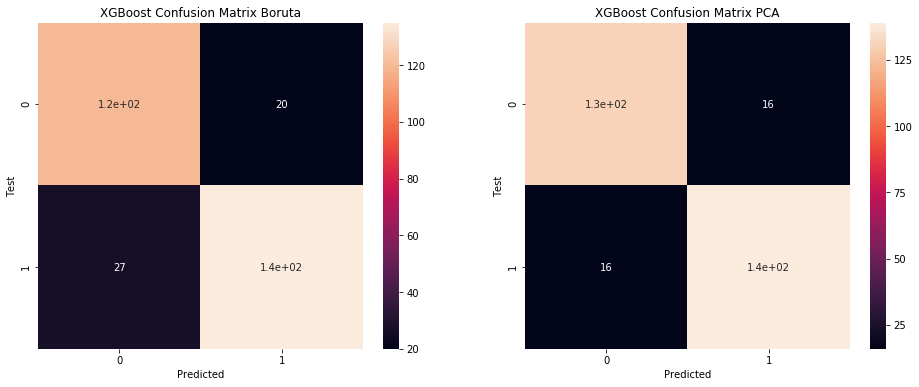

In [29]:
ConfusionMatrix_Boruta = confusion_matrix(y_pred_Boruta,y_test_Boruta)

fig1, ax1 = plt.subplots(1,2,figsize=(16,6))
sns.heatmap(ConfusionMatrix_Boruta,annot=True, ax = ax1[0])
ax1[0].set_title('XGBoost Confusion Matrix Boruta', loc='center')
ax1[0].set_ylabel('Test')
ax1[0].set_xlabel('Predicted')

ConfusionMatrix_PCA = confusion_matrix(y_pred_PCA,y_test_PCA)

sns.heatmap(ConfusionMatrix_PCA,annot=True,ax = ax1[1])
ax1[1].set_title('XGBoost Confusion Matrix PCA', loc='center')
ax1[1].set_ylabel('Test')
ax1[1].set_xlabel('Predicted')
plt.show()

In [30]:
clf=classification_report(y_pred_Boruta,y_test_Boruta)
print("Classification_report para XGboost con Boruta:")
print(clf)
clf_PCA=classification_report(y_pred_PCA,y_test_PCA)
print("Classification_report para XGBoost con PCA:")
print(clf_PCA)

Classification_report para XGboost con Boruta:
              precision    recall  f1-score   support

           N       0.82      0.86      0.84       140
           Y       0.87      0.83      0.85       162

    accuracy                           0.84       302
   macro avg       0.84      0.85      0.84       302
weighted avg       0.85      0.84      0.84       302

Classification_report para XGBoost con PCA:
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       147
           Y       0.90      0.90      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



Con el algoritmo XGBoost conseguimos unos resultados similares para ambos conjuntos, con un acierto superior al 80% siendo el del conjunto de datos de PCA el mejor con un 89,4% de acierto.

## 7. Conclusion

En conclusion, con los algoritmos de Random Forest y con el Decision Tree se consiguen resultados cercanos al 90 % de acierto con el conjunto de datos sin PCA. Cabe destacar que con PCA, para el conjunto de datos de test, independientemente del algoritmo a utilizar se consigue un % de acierto similar y cercano al 90% de acierto.